# TF binding GO (1kb)

In [1]:
import subprocess
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

# box plot of Giggle scores 

upload Universal.CHM.30CpG1kb.bed to Cistrome toolkit  
select total peaks

In [3]:
os.chdir('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/MotifFinding')
cobinding_TF_df_dict = {}
cobinding_TF_ls_dict = {}
for process in ['EarlyEmbryoSpecific', 'SpermSpecific', 'RetinalSpecific', 'HeartSpecific', 'LiverSpecific', 'ProcessSpecific'] :
    gene_df = pd.read_csv(f'total/cistrome_toolkit_results_1kb/old_processSpecific/{process}.CHM.30CpG1kb.bed_result.csv')
    cobinding_TF_df = gene_df
    cobinding_TF_ls = gene_df['Factor'].tolist()
    cobinding_TF_df_dict[process] = cobinding_TF_df
    cobinding_TF_ls_dict[process] = cobinding_TF_ls

cobinding_TF_df_dict

{'EarlyEmbryoSpecific':          GSM_ID  Factor                            Biosource  GIGGLE_score
 0    GSM2274625   MECP2                    Granulocyte;Blood     69.088605
 1    GSM2424702  METTL3                  Embryonic Stem Cell     61.005184
 2    GSM1856445   SUZ12           Embryonic Stem Cell;Embryo     60.608181
 3    GSM1335222   ZFP57                  Embryonic Stem Cell     58.150250
 4    GSM1160650  POLR3D                     Epithelium;Liver     47.637762
 ..          ...     ...                                  ...           ...
 195  GSM1334367    SPI1           Embryonic Stem Cell;Embryo     10.815017
 196  GSM2588427   KMT2D                  Embryonic Stem Cell     10.752168
 197  GSM1087773    USF1                                Liver     10.742510
 198  GSM1674832  POLR2A  P19;Embryonal carcinoma cell;Embryo     10.723075
 199  GSM1370452    KLF4          3T3-L1;Preadipocyte;Adipose     10.645907
 
 [200 rows x 4 columns],
 'SpermSpecific':          GSM_ID  Fac

In [ ]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    
    fig, ax = plt.subplots(figsize=(6.4 * .75, 4.8 * .75), tight_layout = True)
    plot_df = cobinding_TF_df.loc[cobinding_TF_df['Factor'].isin(cobinding_TF_df.groupby(['Factor']).max().sort_values(['GIGGLE_score'], ascending = False).index[:10])]
    sns.stripplot(
        data = plot_df,
        x = 'Factor',
        y = 'GIGGLE_score',
        ax = ax,
        # width = .618,
        palette = 'Set1'
    )
    ax.set_title(f'Universal CHMs (CpG-rich region)')
    ax.set_xticks(range(len(ax.get_xticklabels())))
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right', rotation_mode='anchor')
    ax.set_xlabel('')
    ax.set_ylabel('GIGGLE score')

    fig.savefig(f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make9_strip_TF_binding_cistrome_ggScore_universalCHM_top10TF_30CpG1kb.pdf', transparent = True)    
         

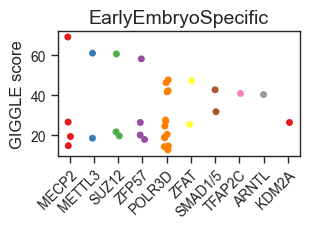

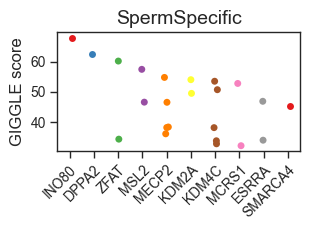

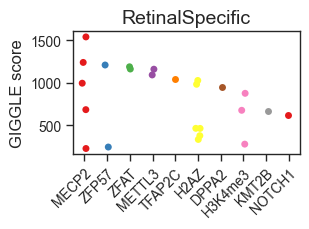

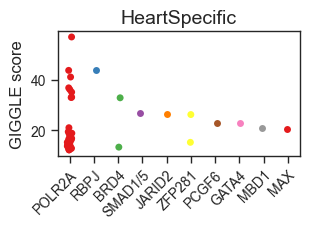

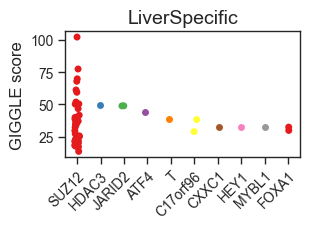

In [6]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    for process in ['EarlyEmbryoSpecific', 'SpermSpecific', 'RetinalSpecific', 'HeartSpecific', 'LiverSpecific',] :
        cobinding_TF_df = cobinding_TF_df_dict[process]
        fig, ax = plt.subplots(figsize=(6.4 * .5, 4.8 * .5), tight_layout = True)
        plot_df = cobinding_TF_df.loc[cobinding_TF_df['Factor'].isin(cobinding_TF_df.groupby(['Factor']).mean().sort_values(['GIGGLE_score'], ascending = False).index[:10])]
        sns.stripplot(
            data = plot_df,
            x = 'Factor',
            y = 'GIGGLE_score',
            ax = ax,
            # width = .618,
            palette = 'Set1'
        )
        ax.set_title(f'{process}')
        ax.set_xticks(range(len(ax.get_xticklabels())))
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right', rotation_mode='anchor')
        ax.set_xlabel('')
        ax.set_ylabel('GIGGLE score')

        fig.savefig(f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make9_strip_TF_binding_cistrome_ggScore_{process}CHM_top10TF_30CpG1kb.pdf', transparent = True)    
                

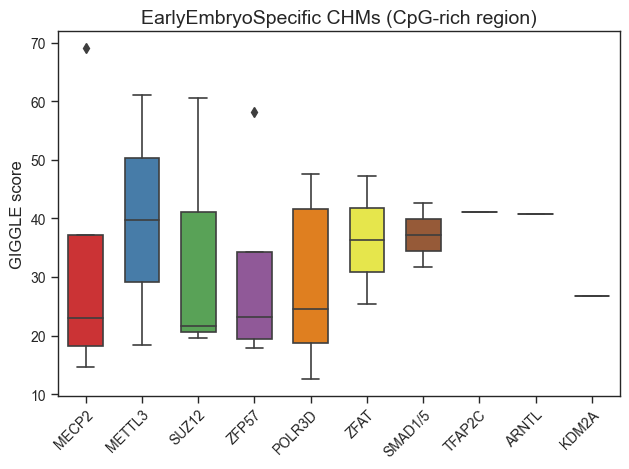

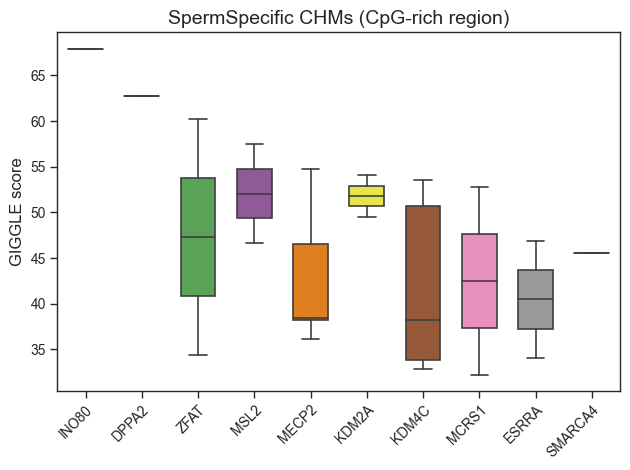

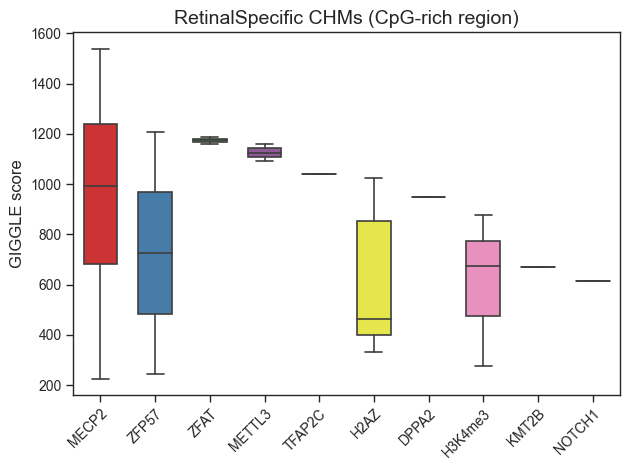

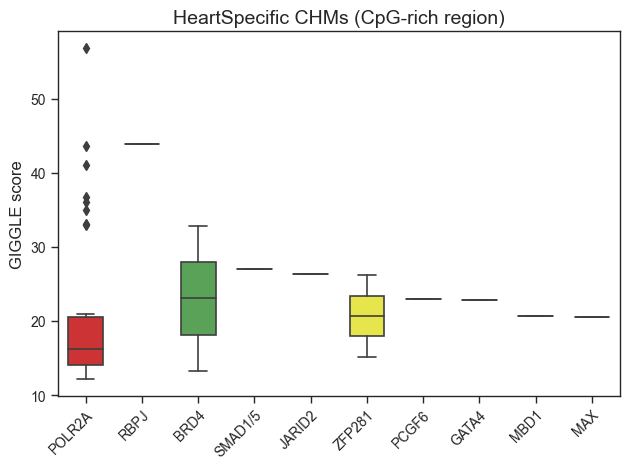

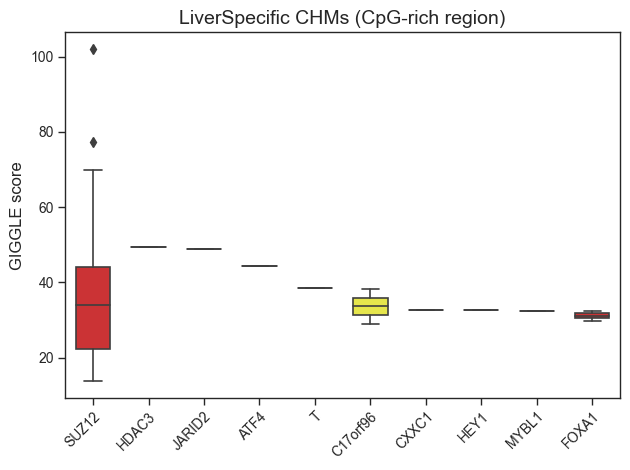

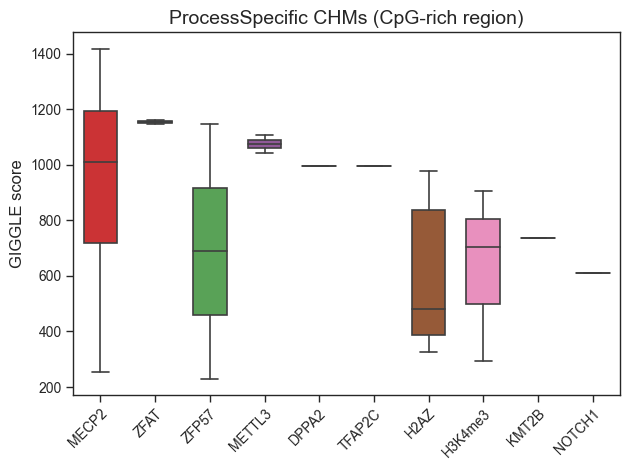

In [ ]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    for process in ['EarlyEmbryoSpecific', 'SpermSpecific', 'RetinalSpecific', 'HeartSpecific', 'LiverSpecific', 'ProcessSpecific'] :
        cobinding_TF_df = cobinding_TF_df_dict[process]
        fig, ax = plt.subplots(figsize=(6.4, 4.8), tight_layout = True)
        plot_df = cobinding_TF_df.loc[cobinding_TF_df['Factor'].isin(cobinding_TF_df.groupby(['Factor']).mean().sort_values(['GIGGLE_score'], ascending = False).index[:10])]
        sns.boxplot(
            data = plot_df,
            x = 'Factor',
            y = 'GIGGLE_score',
            ax = ax,
            width = .618,
            palette = 'Set1'
        )
        ax.set_title(f'{process} CHMs (CpG-rich region)')
        ax.set_xticks(range(len(ax.get_xticklabels())))
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right', rotation_mode='anchor')
        ax.set_xlabel('')
        ax.set_ylabel('GIGGLE score')

        fig.savefig(f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make9_box_TF_binding_cistrome_ggScore_{process}CHM_top10TF_30CpG1kb.pdf', transparent = True)    
                

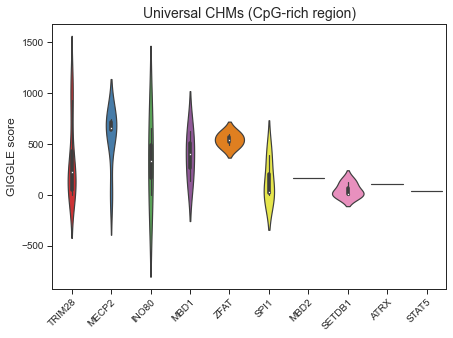

In [5]:
### not used
# with sns.axes_style('white', rc={
#         'xtick.bottom': True,
#         'ytick.left': True
# }), sns.plotting_context('paper',
#                          rc={
#                              'axes.titlesize': 14,
#                              'axes.labelsize': 12,
#                              'xtick.labelsize': 10,
#                              'ytick.labelsize': 10,
#                              'legend.fontsize': 10
#                          }):
#     fig, ax = plt.subplots(figsize=(6.4, 4.8), tight_layout = True)
#     plot_df = cobinding_TF_df.loc[cobinding_TF_df['Factor'].isin(cobinding_TF_df.groupby(['Factor']).mean().sort_values(['GIGGLE_score'], ascending = False).index[:10])]
#     sns.violinplot(
#         data = plot_df,
#         x = 'Factor',
#         y = 'GIGGLE_score',
#         ax = ax,
# #         width = .618,
#         palette = 'Set1'
#     )
#     ax.set_title(f'Universal CHMs (CpG-rich region)')
#     ax.set_xticks(range(len(ax.get_xticklabels())))
#     ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right', rotation_mode='anchor')
#     ax.set_xlabel('')
#     ax.set_ylabel('GIGGLE score')

#     fig.savefig(f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make9_box_TF_binding_cistrome_ggScore_universalCHM_top10TF_30CpG1kb.pdf', transparent = True)    
            

In [5]:
### with giggle = 0 (not used)
for process in ['EarlyEmbryoSpecific', 'SpermSpecific', 'RetinalSpecific', 'HeartSpecific', 'LiverSpecific', 'ProcessSpecific'] :
    cobinding_TF_df = cobinding_TF_df_dict[process]
    pd.DataFrame([x[0]+x[1:].lower() for x in cobinding_TF_df['Factor'].unique()]).to_csv(
        f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/MotifFinding/total/cistrome_toolkit_results_1kb/{process}.CHM.30CpG1kb.TF.txt',
        sep = "\t", header = False, index = False
                                            )

In [7]:
### without giggle = 0 (for supplementary table)
for process in ['EarlyEmbryoSpecific', 'SpermSpecific', 'RetinalSpecific', 'HeartSpecific', 'LiverSpecific', 'ProcessSpecific'] :
    cobinding_TF_df = cobinding_TF_df_dict[process]
    pd.DataFrame([x[0]+x[1:].lower() for x in cobinding_TF_df.loc[cobinding_TF_df['GIGGLE_score']>0]['Factor'].unique()]).to_csv(
        f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/MotifFinding/total/cistrome_toolkit_results_1kb/{process}.CHM.30CpG1kb.TF_giggleOver0.txt',
        sep = "\t", header = False, index = False
                                            )

# GO

In [2]:
# Python functions to read .CSV files into a Pandas DataFrame when the data of interest is before / after one or more empty/blank lines.
import csv
def csv_after_emptylines(filepath, dtype=str):
    """ Read a .CSV into a Pandas DataFrame, but only after at least one blank line has been skipped.
    bl_group_n is the expected number of distinct blocks of blank lines (of any number of rows each) to skip before reading data.
    NB: E.g. pd.read_csv(filepath, skiprows=[0, 1, 2]) works if you know the number of rows to be skipped. Use this function if you have a variable / unknown number of filled rows (to be skipped / ignored) before the empty rows.
    """
    with open(filepath, newline='') as f:
        contents = []
        headers = None
        r = csv.reader(f, delimiter='\t')
        return_df = pd.DataFrame()
        cluster_flag = True
        header_flag = False
        for i, l in enumerate(r):
            if not l:
                df = pd.DataFrame(data=contents, columns=headers, dtype=dtype)
                df['cluster'] = name[0].split(" ")[-1]
                df['enrichment_score'] = float(name[1].split(" ")[-1])
                return_df = pd.concat([return_df, df])
                contents = []
                cluster_flag = True
            else :
                if cluster_flag :
                    name = l
                    cluster_flag = False
                    header_flag = True
                elif header_flag :
                    headers = l
                    header_flag = False
                else :    
                    contents.append(l)
                
        df = pd.DataFrame(data=contents, columns=headers, dtype=dtype)
        df['cluster'] = name[0].split(" ")[-1]
        df['enrichment_score'] = float(name[1].split(" ")[-1])
        return_df = pd.concat([return_df, df])        
        
        return return_df


def csv_until_emptyline(filepath, dtype=str):
    """ Read a .CSV into a Pandas DataFrame until a blank line is found, then stop.
    """
    with open(filepath, newline='') as f:
        contents = []
        r = csv.reader(f, delimiter='\t')
        name = next(r, None)
        for i, l in enumerate(r):
            if not l:
                break
            if i == 0:
                headers = l
                continue
            contents.append(l)
        df = pd.DataFrame(data=contents, columns=headers, dtype=dtype)
        df['cluster'] = name[0].split(' ')[-1]
        df['enrichment_score'] = float(name[1].split(' ')[-1])
        return df

## universal & non CHM

In [3]:
os.chdir('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/MotifFinding/total/cistrome_toolkit_results_1kb')
david_go_df_dict = {}
for t in ['Universal.CHM_giggleOver0.30CpG1kb', 'NonCHMsCpGrich'] :
    df = csv_after_emptylines(f'{t}.GO_BP_ALL.txt')
    df['GO Term'] = df['Term'].str.split('~', expand = True)[1]
    df['-log10(p-value)'] = -np.log10(df['PValue'].astype('float'))
    david_go_df_dict[t.split('.')[0]] = df.loc[df['PValue'].astype('float') <= 0.05]

In [4]:
color_dict = {
    'Universal' : '#DA404E', 
    'NonCHMsCpGrich' : '#507F9B'
}

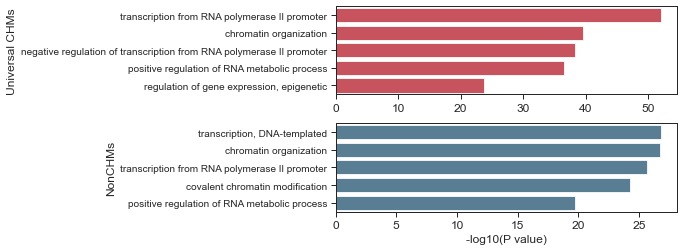

In [7]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 12,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    fig, axes = plt.subplots(2,1,figsize = (6.4 * 1.5, 4.8 * .75), tight_layout= True, sharex = False)
    for i,t in enumerate(['Universal', 'NonCHMsCpGrich']) :
        ax = axes[i]
        df = david_go_df_dict[t].sort_values(['-log10(p-value)'], ascending = False).groupby(['cluster']).head(1)
#         df = david_go_dict[t].loc[david_go_dict[t]['GO Term'].isin(['epoxygenase P450 pathway', 
#                                                                     'cellular response to lipopolysaccharide', 
#                                                                     'inflammatory response to antigenic stimulus'])].sort_values(['-log10(p-value)'], ascending = False)
        if df.empty :
            break
        sns.barplot(
            data = df.head(5),
            y = 'GO Term',
            x = '-log10(p-value)',
            ax = ax,
            color = color_dict[t]
        )
        if i == 1 :
            ax.set_xlabel('-log10(P value)')
            ax.set_ylabel('NonCHMs')
        else :
            ax.set_ylabel('Universal CHMs')
            ax.set_xlabel('')

    fig.savefig(f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make9_bar_GO_universal_nonCHM_TF_1kbBin_giggleOver0.pdf', transparent = True)    

## process-specific

In [4]:
os.chdir('/mnt/Storage/home/wangyiman/CHMsInOtherContexts/CellStateTransition/CHMOrganization/Universal_specific/Features/MotifFinding/total/cistrome_toolkit_results_1kb/old_processSpecific')
david_go_df_dict = {}
for t in ['EarlyEmbryoSpecific', 'SpermSpecific', 'RetinalSpecific', 'HeartSpecific', 'LiverSpecific'] :
    df = csv_after_emptylines(f'{t}.CHM.30CpG1kb.GO_BP_ALL.txt')
    df['GO Term'] = df['Term'].str.split('~', expand = True)[1]
    df['-log10(p-value)'] = -np.log10(df['PValue'].astype('float'))
    david_go_df_dict[t.split('.')[0]] = df.loc[df['PValue'].astype('float') <= 0.05]

In [9]:
color_dict = {
    'EarlyEmbryoSpecific': '#9B1C3D', 
    'PGCsDevelopment' : '#16557A', 
    'SpermSpecific' : '#1B9E77', 
    'RetinalSpecific' : '#BF8B12', 
    'HeartSpecific' : '#2E8BC0', 
    'LiverSpecific' : '#666666',
    'Universal' : '#DA404E',
}

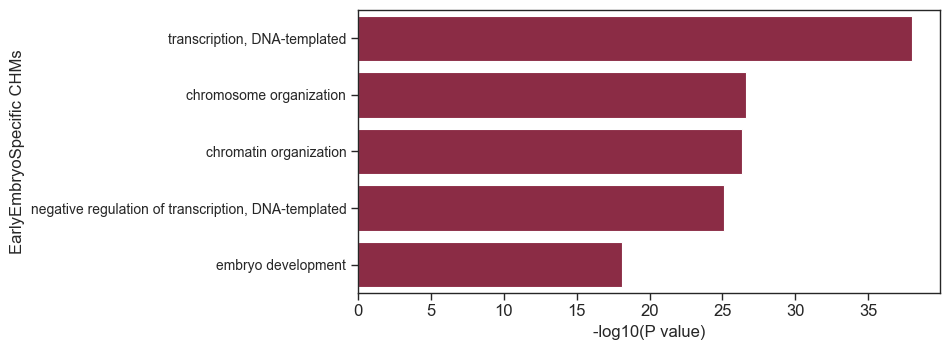

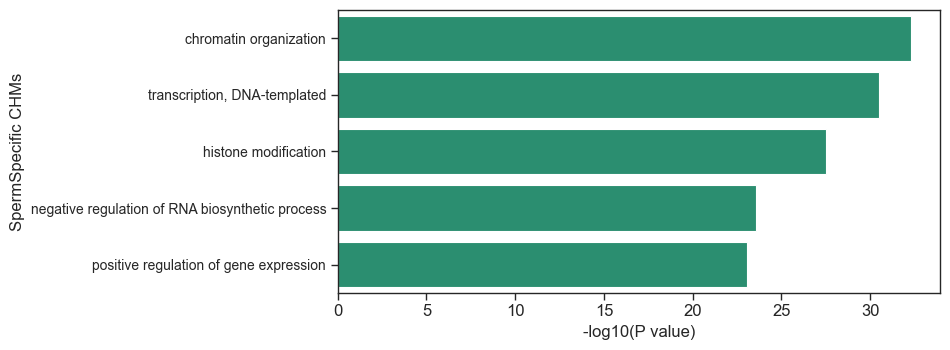

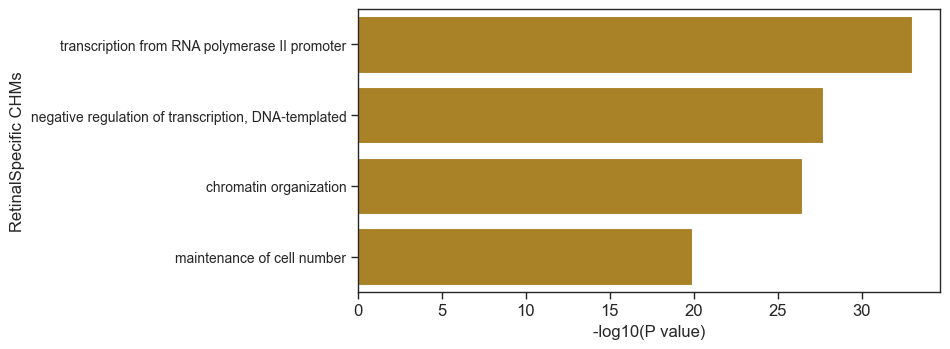

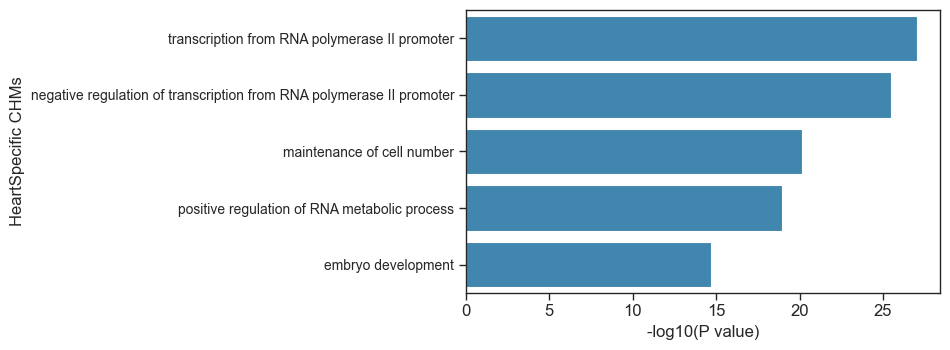

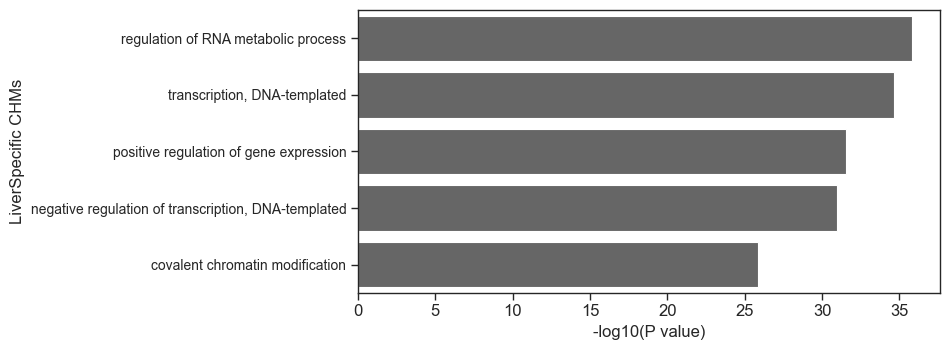

In [10]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 12,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    for i,t in enumerate(['EarlyEmbryoSpecific', 'SpermSpecific', 'RetinalSpecific', 'HeartSpecific', 'LiverSpecific']) :
        fig, axes = plt.subplots(figsize = (6.4 * 1.5, 4.8 * .75), tight_layout= True, sharex = False)
        ax = axes
        df = david_go_df_dict[t].sort_values(['-log10(p-value)'], ascending = False).groupby(['cluster']).head(1)
#         df = david_go_dict[t].loc[david_go_dict[t]['GO Term'].isin(['epoxygenase P450 pathway', 
#                                                                     'cellular response to lipopolysaccharide', 
#                                                                     'inflammatory response to antigenic stimulus'])].sort_values(['-log10(p-value)'], ascending = False)
        if df.empty :
            break
        sns.barplot(
            data = df.head(5),
            y = 'GO Term',
            x = '-log10(p-value)',
            ax = ax,
            color = color_dict[t]
        )
        ax.set_xlabel('-log10(P value)')
        ax.set_ylabel(f'{t} CHMs')


        fig.savefig(f'/mnt/Storage/home/wangyiman/CHMsInOtherContexts/figures/make9_bar_GO_{t}_TF_1kbBin_giggleOver0.pdf', transparent = True)    